# In-Class Exercise: Control with Increasing Muscle Complexity

## 🚀 Goal
Move a single-joint arm from a fully extended position (θ = 0) to a 90° bend (θ = π/2), and stabilize it there using three different control approaches.

## 🔧 Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants (SI units)
m = 2.0           # kg
r = 0.04          # m (moment arm)
I = 0.05          # kg·m²
b = 0.05          # damping coefficient
F_max = 1000.0    # N
g = 9.81          # m/s²

# Hill-type parameters
theta_opt = np.pi/2
w = 0.4
v_max = 5.0
k_v = 1.0

theta_goal = np.pi / 2
T_total = 2.5  # seconds

## 💪 Muscle Models

In [2]:
def muscle_force_simple_dual(a_bi, a_tri, dtheta):
    F_bi = a_bi * (F_max - k_v * dtheta)
    F_tri = a_tri * (F_max + k_v * dtheta)
    return r * (F_bi - F_tri)

def muscle_force_hill_dual(a_bi, a_tri, theta, dtheta):
    f_l_bi = np.exp(-((theta - theta_opt) / w)**2)
    f_l_tri = np.exp(-((theta - (np.pi - theta_opt)) / w)**2)
    f_v_bi = (v_max - dtheta) / (v_max + k_v * dtheta)
    f_v_tri = (v_max + dtheta) / (v_max - k_v * dtheta)
    F_bi = a_bi * f_l_bi * f_v_bi * F_max
    F_tri = a_tri * f_l_tri * f_v_tri * F_max
    return r * (F_bi - F_tri)

## 🌀 Dynamics Function

In [3]:
def simulate_two_muscles(controller, model='simple'):
    def dynamics(t, state):
        theta, dtheta = state
        a_bi, a_tri = controller(t, theta, dtheta)

        if model == 'simple':
            tau = muscle_force_simple_dual(a_bi, a_tri, dtheta)
        elif model == 'hill':
            tau = muscle_force_hill_dual(a_bi, a_tri, theta, dtheta)
        else:
            raise ValueError("Unknown model type")

        ddtheta = (tau - b * dtheta - m * g * r * np.sin(theta)) / I
        return [dtheta, ddtheta]

    sol = solve_ivp(dynamics, [0, T_total], [0, 0], t_eval=np.linspace(0, T_total, 300))
    return sol

## 🧠 Part 1: Direct Torque Control

Fill in the torque controller ot return the torque to apply as a function of t, theta and dtheta

In [4]:
def torque_controller(t, theta, dtheta):
    # STUDENT WORK GOES HERE
    return zeros_like(t)

def simulate_direct_torque():
    def dynamics(t, state):
        theta, dtheta = state
        tau = torque_controller(t, theta, dtheta)
        ddtheta = (tau - b * dtheta - m * g * r * np.sin(theta)) / I
        return [dtheta, ddtheta]

    sol = solve_ivp(dynamics, [0, T_total], [0, 0], t_eval=np.linspace(0, T_total, 300))
    return sol

sol_direct = simulate_direct_torque()

NameError: name 'zeros_like' is not defined

## 🧠 Part 2: Two-Muscle Control (Simple Model)

Fill in the controller to return biceps and triceps activation (between 0 and 1) as a function of t, theta, and dtheta.

In [ ]:
def dual_activation_controller(t, theta, dtheta):
    a_bi = zeros_like(t)
    a_tri = zeros_like(t)
    return a_bi, a_tri

sol_simple = simulate_two_muscles(dual_activation_controller, model='simple')

## 🧠 Part 3: Two-Muscle Control (Hill-Type Model)

Fill in the controller to return biceps and triceps activation as a function of t, theta, and dtheta

In [ ]:
def hill_controller(t, theta, dtheta):
    a_bi = zeros_like(t)
    a_tri = zeros_like(t)
    return a_bi, a_tri

In [ ]:
sol_hill = simulate_two_muscles(hill_controller, model='hill')

## 📊 Plotting

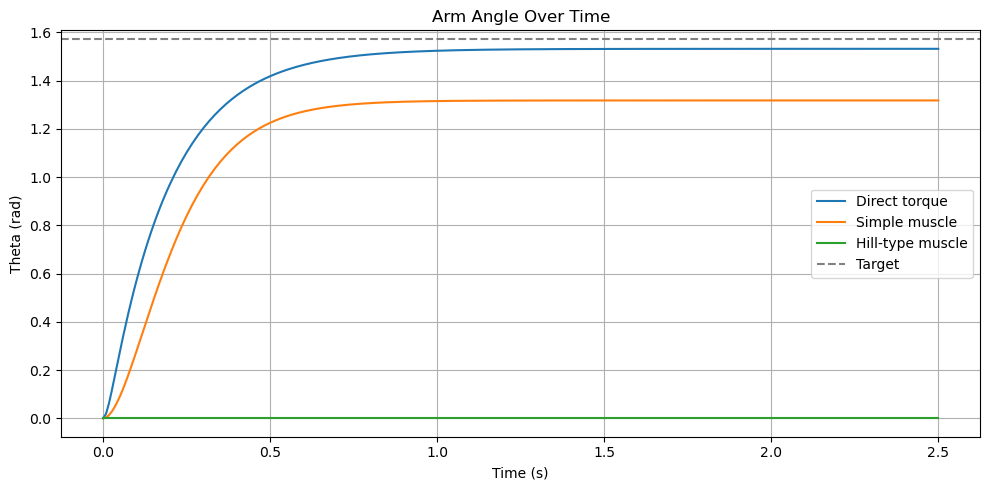

In [ ]:
def plot_theta(sol, label):
    plt.plot(sol.t, sol.y[0], label=label)

plt.figure(figsize=(10, 5))
plot_theta(sol_direct, "Direct torque")
plot_theta(sol_simple, "Simple muscle")
plot_theta(sol_hill, "Hill-type muscle")
plt.axhline(theta_goal, color='gray', linestyle='--', label='Target')
plt.xlabel("Time (s)")
plt.ylabel("Theta (rad)")
plt.title("Arm Angle Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ✅ Summary Prompts for Students
- Which model gave you the best stabilization?
- How did muscle constraints affect your control options?
- What would change if you added noise or time delay?

> **Instructor answer:** Hill model reveals the limitations of naive control strategies—students begin to see why biological control is hard!